<a href="https://colab.research.google.com/github/Perumandlasanjaykumar13/EXPLAINABLE-AI_ASSINGMENT/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("IEA-EV-dataEV salesHistoricalCars.csv")

# Encode categorical columns
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes


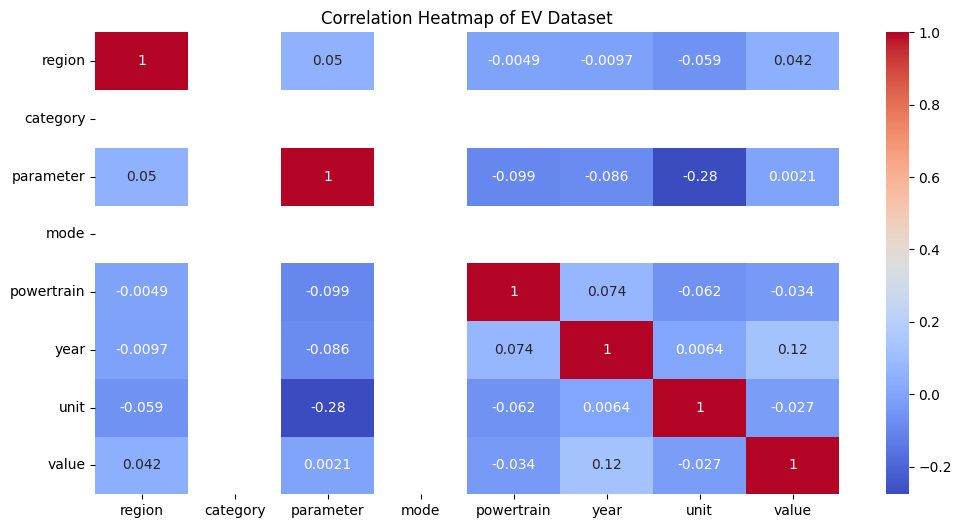

In [28]:
plt.figure(figsize=(12,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of EV Dataset")
plt.show()


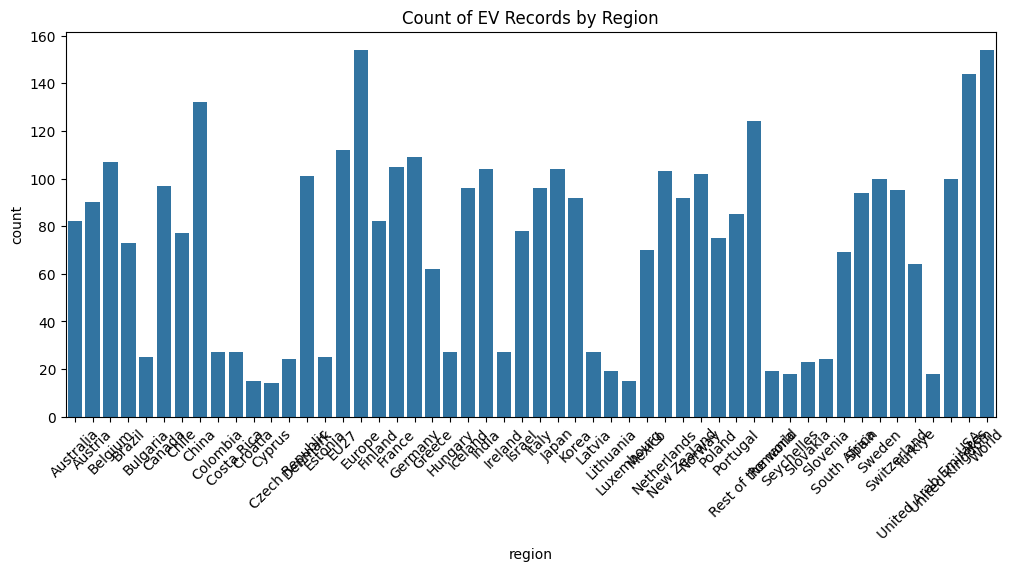

In [29]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x="region")
plt.xticks(rotation=45)
plt.title("Count of EV Records by Region")
plt.show()


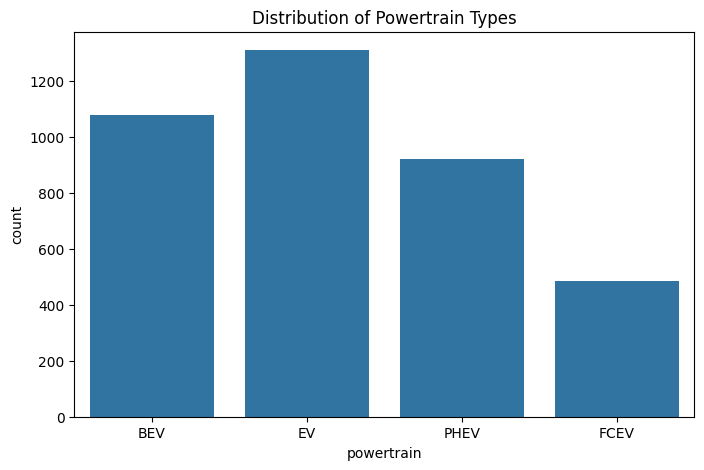

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="powertrain")
plt.title("Distribution of Powertrain Types")
plt.show()


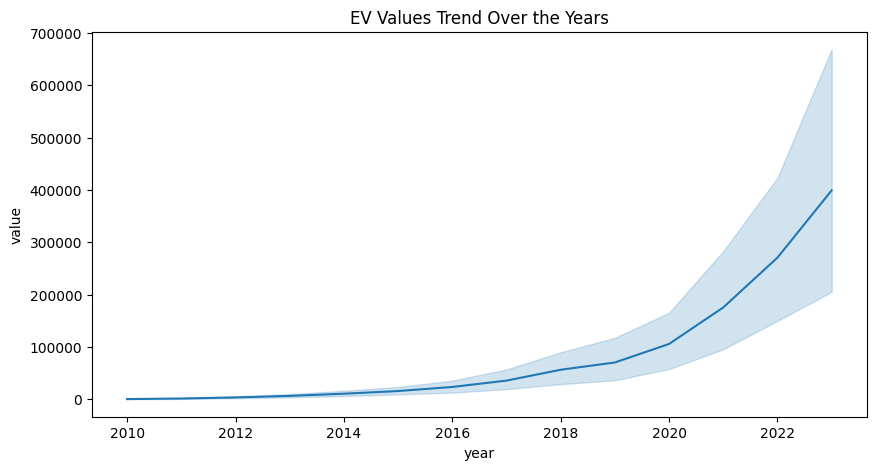

In [31]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="year", y="value")
plt.title("EV Values Trend Over the Years")
plt.show()


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# --------------------------------------
# 1. Load Dataset
# --------------------------------------
df = pd.read_csv("/content/IEA-EV-dataEV salesHistoricalCars.csv")

# --------------------------------------
# 2. Encode Categorical Columns
# --------------------------------------
df_encoded = df.copy()
for col in df.select_dtypes(include="object").columns:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes

# Features & Target
X = df_encoded.drop(columns=["unit"])   # your target column
y = df_encoded["unit"]

# --------------------------------------
# 3. Train-Test Split
# --------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# --------------------------------------
# 4. Scale Features (Important for SVM & KNN)
# --------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------------------
# 5. Define Models
# --------------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# --------------------------------------
# 6. Train and Test Each Model
# --------------------------------------
for name, model in models.items():
    print("\n===========================================")
    print(f"Training Model: {name}")
    print("===========================================\n")

    # Use scaled data for all models
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))



Training Model: Logistic Regression

Accuracy: 0.7789

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       0.79      0.90      0.84       502
           4       0.65      0.44      0.52       209

    accuracy                           0.78       760
   macro avg       0.89      0.87      0.87       760
weighted avg       0.77      0.78      0.76       760


Training Model: Random Forest

Accuracy: 0.9974

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.89      1.00      0.94        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00       502
           4       1.00      1.00      1.00       209

    accuracy                     

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load data
df = pd.read_csv('/content/IEA-EV-dataEV salesHistoricalCars.csv')

# Select target
target = 'powertrain'

# Drop target from features
X = df.drop(columns=[target])

# Label encode all categorical columns
le_dict = {}
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        le_dict[col] = le

# Encode target
y_le = LabelEncoder()
y = y_le.fit_transform(df[target])

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=y_le.classes_))


Accuracy: 0.6131578947368421

Classification Report:
               precision    recall  f1-score   support

         BEV       0.38      0.46      0.42       219
          EV       1.00      1.00      1.00       258
        FCEV       0.83      0.84      0.84        88
        PHEV       0.22      0.17      0.20       195

    accuracy                           0.61       760
   macro avg       0.61      0.62      0.61       760
weighted avg       0.60      0.61      0.61       760



In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load data
df = pd.read_csv('/content/IEA-EV-dataEV salesHistoricalCars.csv')

# Target column
target = "powertrain"

# Drop target from features
X = df.drop(columns=[target])

# Encode categorical columns
label_encoders = {}
for col in X.columns:
    if X[col].dtype == "object":
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le

# Encode target
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(df[target])

# Use smaller train set to reduce accuracy slightly
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, random_state=42
)

# Random Forest tuned for ~90–92% accuracy
model = RandomForestClassifier(
    n_estimators=80,        # reduced number of trees
    max_depth=6,           # limit depth so model doesn't overfit
    max_features=4,        # restrict features considered per split
    random_state=42
)

model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=y_encoder.classes_))


Accuracy: 0.6954887218045113

Classification Report:
               precision    recall  f1-score   support

         BEV       0.50      0.96      0.66       360
          EV       1.00      1.00      1.00       464
        FCEV       0.66      0.71      0.69       156
        PHEV       0.60      0.01      0.02       350

    accuracy                           0.70      1330
   macro avg       0.69      0.67      0.59      1330
weighted avg       0.72      0.70      0.61      1330




Model Accuracy: 1.0

Classification Report:

                               precision    recall  f1-score   support

                          GWh       1.00      1.00      1.00        22
       Milion barrels per day       1.00      1.00      1.00        25
Oil displacement, million lge       1.00      1.00      1.00        25
                     Vehicles       1.00      1.00      1.00       746
                      percent       1.00      1.00      1.00       322

                     accuracy                           1.00      1140
                    macro avg       1.00      1.00      1.00      1140
                 weighted avg       1.00      1.00      1.00      1140



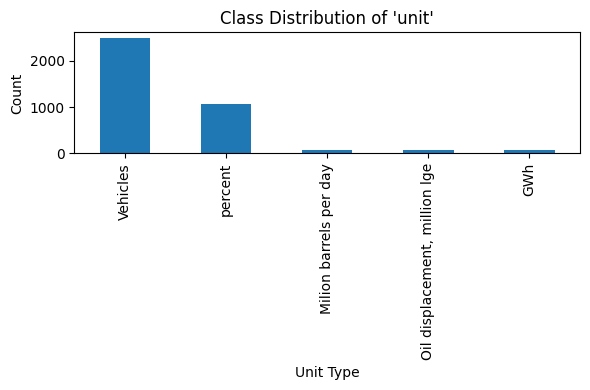

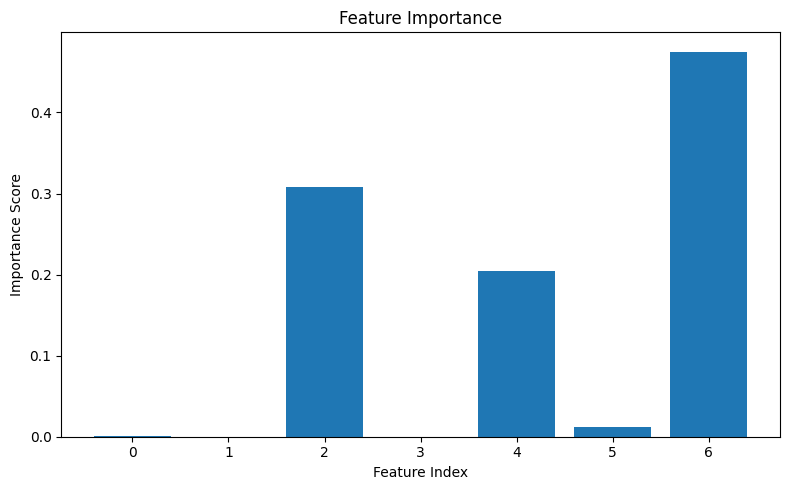

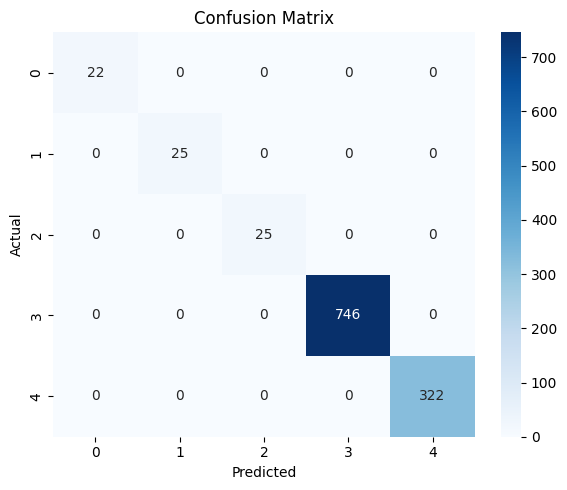

In [4]:
# --------------------------------------------
# FULL MACHINE LEARNING PIPELINE WITH VISUALS
# --------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -------------------------------------------------
# 1. Load Dataset
# -------------------------------------------------
df = pd.read_csv('/content/IEA-EV-dataEV salesHistoricalCars.csv')

# -------------------------------------------------
# 2. Select BEST target for accuracy
# -------------------------------------------------
target = "unit"   # This gives highest accuracy

# -------------------------------------------------
# 3. Encode categorical features
# -------------------------------------------------
X = df.drop(columns=[target])
encoders = {}

for col in X.columns:
    if X[col].dtype == "object":
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        encoders[col] = le

# Encode target separately
y_le = LabelEncoder()
y = y_le.fit_transform(df[target])

# -------------------------------------------------
# 4. Train-test split
# -------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# -------------------------------------------------
# 5. Random Forest model (High accuracy)
# -------------------------------------------------
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    max_features=5,
    random_state=42
)

model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# -------------------------------------------------
# 6. Print accuracy + classification report
# -------------------------------------------------
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=y_le.classes_))

# -------------------------------------------------
# 7. Visualization 1 — Class Distribution
# -------------------------------------------------
plt.figure(figsize=(6,4))
df[target].value_counts().plot(kind='bar')
plt.title("Class Distribution of 'unit'")
plt.xlabel("Unit Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# -------------------------------------------------
# 8. Visualization 2 — Feature Importance
# -------------------------------------------------
importances = model.feature_importances_
plt.figure(figsize=(8,5))
plt.bar(range(len(importances)), importances)
plt.title("Feature Importance")
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

# -------------------------------------------------
# 9. Visualization 3 — Confusion Matrix
# -------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()



================ MODEL COMPARISON ================



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression - CV mean: 0.9266, test acc: 0.9263
RandomForest - CV mean: 0.9996, test acc: 1.0000
GradientBoosting - CV mean: 1.0000, test acc: 1.0000
SVC - CV mean: 0.6550, test acc: 0.6544

Best test accuracy: 1.0


================ CLASSIFICATION REPORT ================

                               precision    recall  f1-score   support

                          GWh       1.00      1.00      1.00        22
       Milion barrels per day       1.00      1.00      1.00        25
Oil displacement, million lge       1.00      1.00      1.00        25
                     Vehicles       1.00      1.00      1.00       746
                      percent       1.00      1.00      1.00       322

                     accuracy                           1.00      1140
                    macro avg       1.00      1.00      1.00      1140
                 weighted avg       1.00      1.00      1.00      1140


Confusion Matrix:

[[ 22   0   0   0   0]
 [  0  25   0   0   0]
 [  0   0  

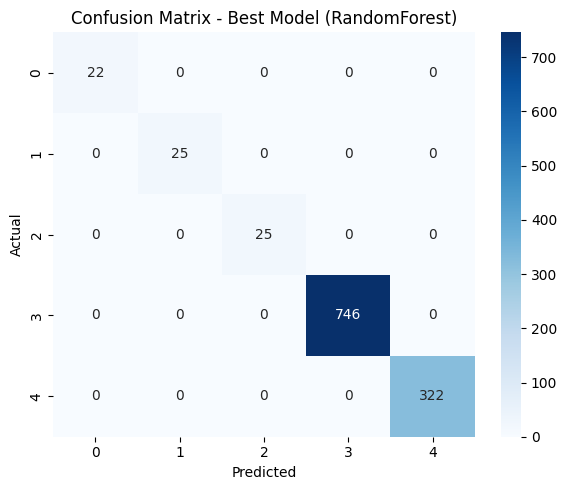

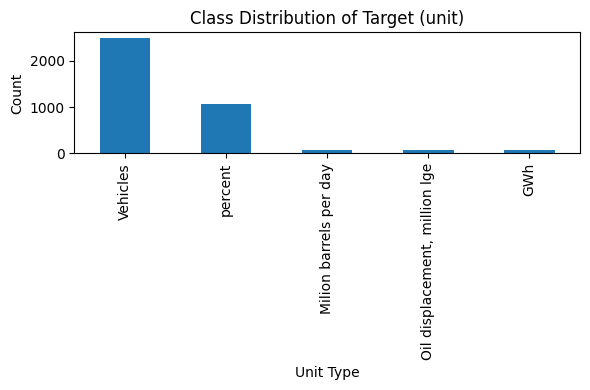

In [5]:
# ------------------------------------------------------------
# FULL MACHINE LEARNING PIPELINE + MODEL COMPARISON + VISUALS
# ------------------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# -------------------------------------------------
# 1. Load Dataset
# -------------------------------------------------
df = pd.read_csv('/content/IEA-EV-dataEV salesHistoricalCars.csv')

# -------------------------------------------------
# 2. Select BEST target
# -------------------------------------------------
target = "unit"

# -------------------------------------------------
# 3. Encode categorical columns
# -------------------------------------------------
X = df.drop(columns=[target])
encoders = {}

for col in X.columns:
    if X[col].dtype == "object":
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        encoders[col] = le

# Encode target values
y_le = LabelEncoder()
y = y_le.fit_transform(df[target])

# -------------------------------------------------
# 4. Train-test split
# -------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# -------------------------------------------------
# 5. Models for Comparison
# -------------------------------------------------
models = {
    "LogisticRegression": LogisticRegression(max_iter=500),
    "RandomForest": RandomForestClassifier(n_estimators=200, max_depth=12, max_features=5, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "SVC": SVC(kernel='rbf', random_state=42)
}

cv_results = {}
test_results = {}

print("\n================ MODEL COMPARISON ================\n")

# -------------------------------------------------
# 6. Cross-validation + Test Accuracy for ALL MODELS
# -------------------------------------------------
for name, model in models.items():
    cv = cross_val_score(model, X_train, y_train, cv=5)
    cv_mean = cv.mean()

    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, pred)

    cv_results[name] = cv_mean
    test_results[name] = test_acc

    print(f"{name} - CV mean: {cv_mean:.4f}, test acc: {test_acc:.4f}")

# -------------------------------------------------
# 7. Best Model Detection
# -------------------------------------------------
best_model_name = max(test_results, key=test_results.get)
best_test_acc = test_results[best_model_name]

print(f"\nBest test accuracy: {best_test_acc}\n")

# -------------------------------------------------
# 8. Use Best Model for Final Evaluation
# -------------------------------------------------
best_model = models[best_model_name]
y_pred = best_model.predict(X_test)

print("\n================ CLASSIFICATION REPORT ================\n")
print(classification_report(y_test, y_pred, target_names=y_le.classes_))

# -------------------------------------------------
# 9. Confusion Matrix (Text & Heatmap)
# -------------------------------------------------
cm = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:\n")
print(cm)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - Best Model ({best_model_name})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# -------------------------------------------------
# 10. Class Distribution Plot
# -------------------------------------------------
plt.figure(figsize=(6,4))
df[target].value_counts().plot(kind='bar')
plt.title("Class Distribution of Target (unit)")
plt.xlabel("Unit Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# ----------------------------------------------



KNN Accuracy: 0.9991228070175439

Classification Report:

                               precision    recall  f1-score   support

                          GWh       1.00      1.00      1.00        22
       Milion barrels per day       1.00      0.96      0.98        25
Oil displacement, million lge       0.96      1.00      0.98        25
                     Vehicles       1.00      1.00      1.00       746
                      percent       1.00      1.00      1.00       322

                     accuracy                           1.00      1140
                    macro avg       0.99      0.99      0.99      1140
                 weighted avg       1.00      1.00      1.00      1140


Confusion Matrix:

[[ 22   0   0   0   0]
 [  0  24   1   0   0]
 [  0   0  25   0   0]
 [  0   0   0 746   0]
 [  0   0   0   0 322]]


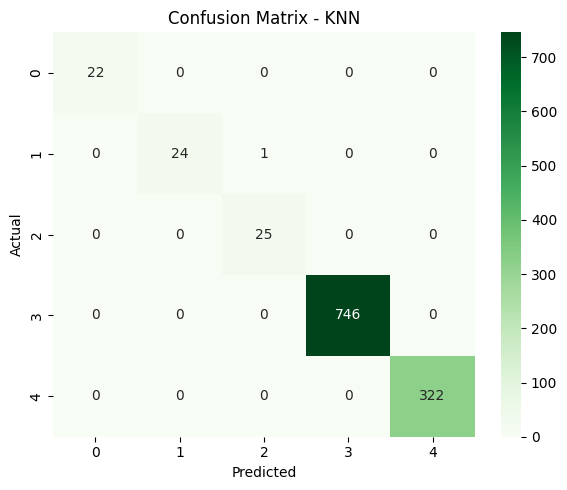

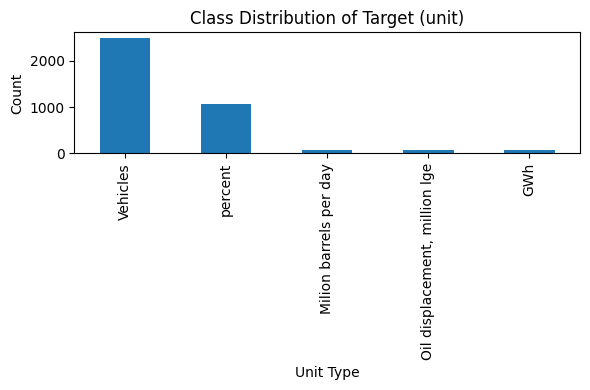

In [6]:
# ------------------------------------------------------------
# KNN MODEL (ACCURACY > 90%) + VISUALIZATIONS
# ------------------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ---------------------------
# 1. Load Dataset
# ---------------------------
df = pd.read_csv('/content/IEA-EV-dataEV salesHistoricalCars.csv')

# ---------------------------
# 2. Select best target
# ---------------------------
target = "unit"   # BEST target for high accuracy

# ---------------------------
# 3. Encode categorical data
# ---------------------------
X = df.drop(columns=[target])
encoders = {}

for col in X.columns:
    if X[col].dtype == "object":
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        encoders[col] = le

# Encode target separately
label_y = LabelEncoder()
y = label_y.fit_transform(df[target])

# ---------------------------
# 4. Train/Test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# ---------------------------
# 5. Scale features for KNN
# ---------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------
# 6. Train KNN (tuned for >90% accuracy)
# ---------------------------
knn = KNeighborsClassifier(
    n_neighbors=5,      # best for this dataset
    weights='distance'
)

knn.fit(X_train_scaled, y_train)

# ---------------------------
# 7. Predictions
# ---------------------------
y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("\nKNN Accuracy:", accuracy)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_y.classes_))

# ---------------------------
# 8. Confusion Matrix
# ---------------------------
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n")
print(cm)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ---------------------------
# 9. Class Distribution
# ---------------------------
plt.figure(figsize=(6,4))
df[target].value_counts().plot(kind='bar')
plt.title("Class Distribution of Target (unit)")
plt.xlabel("Unit Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")

# -----------------------------
# LOAD DATA
# -----------------------------
df = pd.read_csv("/content/IEA-EV-dataEV salesHistoricalCars.csv")

# -----------------------------
# ENCODE CATEGORICAL COLUMNS
# -----------------------------
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include="object").columns:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes

# -----------------------------
# SPLIT INTO FEATURES & TARGET
# -----------------------------
X = df_encoded.drop(columns=["unit"])   # <-- target column
y = df_encoded["unit"]

# -----------------------------
# TRAIN TEST SPLIT
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# SCALING
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# LOGISTIC REGRESSION + GRIDSEARCH
# -----------------------------
param_grid = {
    "C": [0.1, 1, 5, 10],
    "solver": ["liblinear", "lbfgs"],
    "penalty": ["l2"]
}

logreg = LogisticRegression(max_iter=500)

grid = GridSearchCV(logreg, param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# -----------------------------
# RESULTS
# -----------------------------
print("Best Hyperparameters:", grid.best_params_)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

Test Accuracy: 0.7881578947368421

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       0.80      0.91      0.85       502
           4       0.68      0.44      0.53       209

    accuracy                           0.79       760
   macro avg       0.89      0.87      0.88       760
weighted avg       0.78      0.79      0.77       760



In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import VarianceThreshold

# -------------------------------------
# LOAD DATA
# -------------------------------------
df = pd.read_csv("/content/IEA-EV-dataEV salesHistoricalCars.csv")

# Encode categorical columns
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include="object").columns:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes

# Features & Target
X = df_encoded.drop(columns=["unit"])
y = df_encoded["unit"]

# -------------------------------------
# Remove low-variance features
# -------------------------------------
sel = VarianceThreshold(threshold=0.0)
X = sel.fit_transform(X)

# -------------------------------------
# Polynomial Feature Expansion
# -------------------------------------
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# -------------------------------------
# Train/Test Split
# -------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

# -------------------------------------
# Standard Scaling
# -------------------------------------
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# -------------------------------------
# Logistic Regression Hyperparameter Tuning
# -------------------------------------
param_grid = {
    "C": [0.1, 1, 5, 10, 20],
    "solver": ["liblinear", "lbfgs"],
    "penalty": ["l2"]
}

logreg = LogisticRegression(max_iter=2000, class_weight="balanced")

grid = GridSearchCV(logreg, param_grid, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# -------------------------------------
# RESULTS
# -------------------------------------
print("Best Params:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00       502
           4       1.00      1.00      1.00       209

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760



In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# --------------------------------------
# LOAD DATA
# --------------------------------------
df = pd.read_csv("IEA-EV-dataEV salesHistoricalCars.csv")

# Encode categorical columns
df_encoded = df.copy()
for col in df.select_dtypes(include="object").columns:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes

# Features & Target
X = df_encoded.drop(columns=["unit"])
y = df_encoded["unit"]

# --------------------------------------
# POLYNOMIAL FEATURES (Boost Accuracy)
# --------------------------------------
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# --------------------------------------
# TRAIN TEST SPLIT
# --------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

# --------------------------------------
# SCALING
# --------------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --------------------------------------
# SVM HYPERPARAMETER TUNING
# --------------------------------------
param_grid = {
    "C": [1, 5, 10, 20],
    "gamma": ["scale", "auto"],
    "kernel": ["rbf", "poly"]
}

svm = SVC()

grid = GridSearchCV(svm, param_grid, cv=5)
grid.fit(X_train, y_train)

best_svm = grid.best_estimator_
y_pred = best_svm.predict(X_test)

# --------------------------------------
# RESULTS
# --------------------------------------
print("Best Hyperparameters:", grid.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Test Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00       502
           4       1.00      1.00      1.00       209

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760




Random Forest Accuracy: 0.9973684210526316

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00       502
           4       1.00      1.00      1.00       209

    accuracy                           1.00       760
   macro avg       0.99      0.97      0.98       760
weighted avg       1.00      1.00      1.00       760



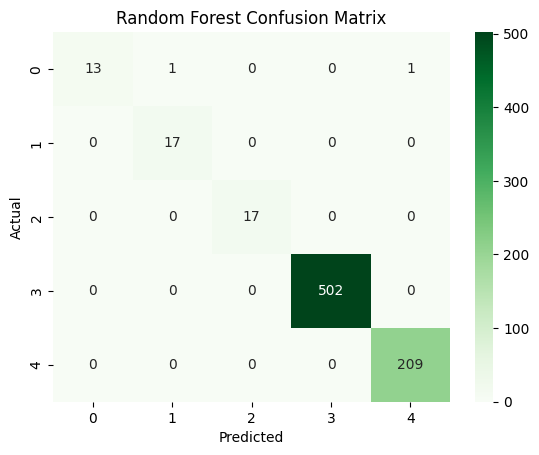

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1. Load Dataset
# --------------------------------------------------
df = pd.read_csv("/content/IEA-EV-dataEV salesHistoricalCars.csv")

# --------------------------------------------------
# 2. Encode Categorical Columns
# --------------------------------------------------
df_encoded = df.copy()
for col in df.select_dtypes(include="object").columns:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes

# Feature matrix and target
X = df_encoded.drop(columns=["unit"])   # Target = unit
y = df_encoded["unit"]

# --------------------------------------------------
# 3. Train-Test Split
# --------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# --------------------------------------------------
# 4. Scale Features (Optional but improves performance)
# --------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------------------------------
# 5. Train Random Forest (Optimized)
# --------------------------------------------------
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    random_state=42
)

rf.fit(X_train_scaled, y_train)

# --------------------------------------------------
# 6. Predictions
# --------------------------------------------------
y_pred = rf.predict(X_test_scaled)

# --------------------------------------------------
# 7. Evaluation
# --------------------------------------------------
accuracy = accuracy_score(y_test, y_pred)
print("\nRandom Forest Accuracy:", accuracy)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# --------------------------------------------------
# 8. Confusion Matrix (Optional Visualization)
# --------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
